In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV in pandas
data = ("/Users/chac/Desktop/Class/Project_4/amazon_product_reviews_ML/Resources/cleaned_data.csv")
df = pd.read_csv(data)

# Display DataFrame
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,1,$7.49,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,1,$149.95,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
3,3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
4,4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,1,$15.99,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


In [3]:
# Determine column names
df.columns

Index(['Unnamed: 0', 'asin', 'product_title', 'product_price', 'currency',
       'product_star_rating', 'product_num_ratings', 'product_num_offers',
       'product_minimum_offer_price', 'is_best_seller', 'is_amazon_choice',
       'is_prime', 'climate_pledge_friendly', 'sales_volume', 'delivery'],
      dtype='object')

Now that we have a clearer view of the DataFrame columns, we can make informed decisions about which columns will be utilized for the remainder of the code.

In [4]:
# Drop unnecessary columns
columns_to_drop = (["Unnamed: 0", "product_num_offers", "product_minimum_offer_price"])
df = df.drop((columns_to_drop), axis = 1)

# Display updated DataFrame
df.head()

,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


Removing unnecessary columns from the DataFrame streamlines the dataset, reducing clutter and ensuring that only relevant data is retained for analysis. This practice enhances data clarity and focus, enabling more efficient and targeted utilization of the dataset.

In [5]:
# Define a function to convert text to numeric
def text_to_numeric(text):
    if "K" in text:
        return int(float(text.replace("K", "").replace("+ bought in past month", "")) * 1000)
    else:
        return int(text.replace("+ bought in past month", ""))

# Convert sales_volume column to numeric
df["sales_volume_numeric"] = df["sales_volume"].apply(text_to_numeric)

# Display results
df.head()

,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,sales_volume_numeric
0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",4000
1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",4000
2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ...",4000
3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",500


The text_to_numeric function converts text to numeric values, handling "K" (thousands) and removing extra text. This function is applied to the sales_volume column, creating a new sales_volume_numeric column.

In [6]:
# Check to see column was created successfully vs the original 
print(df[["sales_volume", "sales_volume_numeric"]])

                  sales_volume  sales_volume_numeric
0     4K+ bought in past month                  4000
1     4K+ bought in past month                  4000
2     4K+ bought in past month                  4000
3    10K+ bought in past month                 10000
4    500+ bought in past month                   500
..                         ...                   ...
360                          0                     0
361  300+ bought in past month                   300
362                          0                     0
363                          0                     0
364                          0                     0

[365 rows x 2 columns]


Through a side-by-side comparison, we have verified that the functions operated correctly, producing accurate numbers and usable data for the subsequent code.

In [7]:
# Create a new column 'total_revenue' by multiplying 'product_price' with 'sales_volume_numeric'
df["total_revenue"] = df["product_price"] * df["sales_volume_numeric"]

# Display the updated DataFrame
df[["product_title", "product_price", "sales_volume_numeric", "total_revenue", "is_best_seller"]].head()

,product_title,product_price,sales_volume_numeric,total_revenue,is_best_seller
0,USB C Charger for iPhone 14 13 12 11 Charger [...,9,4000,36000,False
1,USB C to Lightning Cable [Apple MFi Certified]...,7,4000,28000,False
2,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,4000,596000,False
3,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,10000,290000,False
4,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,500,7500,False


With the sales volume metric now available, we can calculate the total revenue for each product by combining the sales volume with the product price. This will provide a comprehensive representation of the total revenue per product.

In [8]:
from scipy.stats import ttest_rel

# Perform paired t-test for each pair of variables
columns_to_test = [
    ("product_star_rating", "product_num_ratings"),
    ("product_price", "total_revenue"),
    ("product_price", "sales_volume_numeric"),
    ("product_star_rating", "total_revenue"),
    ("product_star_rating", "sales_volume_numeric")
]

for col1, col2 in columns_to_test:
    t_statistic, p_value = ttest_rel(df[col1], df[col2])
    print(f"Paired t-test results for {col1} vs {col2}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print()

Paired t-test results for product_star_rating vs product_num_ratings:
T-statistic: -8.73220093424505
P-value: 9.188701970625944e-17

Paired t-test results for product_price vs total_revenue:
T-statistic: -3.38109049201098
P-value: 0.0008003068158418073

Paired t-test results for product_price vs sales_volume_numeric:
T-statistic: -9.689857332026492
P-value: 6.63767714954632e-20

Paired t-test results for product_star_rating vs total_revenue:
T-statistic: -3.3831199214592838
P-value: 0.0007945965246427241

Paired t-test results for product_star_rating vs sales_volume_numeric:
T-statistic: -9.980333692921782
P-value: 6.790968229881407e-21



product_star_rating vs product_num_ratings:
There is a significant difference between product star ratings and the number of ratings received. This suggests that products with different star ratings tend to have significantly different numbers of ratings.

product_price vs total_revenue:
There is a significant difference between product prices and total revenue generated. It implies that products with different prices generate significantly different total revenues.

product_price vs sales_volume_numeric:
There is a significant difference between product prices and sales volume. It means that products with different prices tend to have significantly different sales volumes.

product_star_rating vs total_revenue:
There is a significant difference between product star ratings and total revenue generated. This suggests that products with different star ratings generate significantly different total revenues.

product_star_rating vs sales_volume_numeric:
There is a significant difference between product star ratings and sales volume. It implies that products with different star ratings tend to have significantly different sales volumes.

In [9]:
# Determine the item with the highest number of ratings and the lowest number of ratings
# Find the most rated product
most_rated_product = df.loc[df["product_num_ratings"].idxmax()]

# Find the least rated product
least_rated_product = df.loc[df["product_num_ratings"].idxmin()]

# Output the results
print("Most Rated Product:")
print(f"Title: {most_rated_product['product_title']}")
print(f"Number of Ratings: {most_rated_product['product_num_ratings']}")
print(f"Star Rating: {most_rated_product['product_star_rating']}")
print(f"Is Bestseller: {most_rated_product['is_best_seller']}")
print("\nLeast Rated Product:")
print(f"Title: {least_rated_product['product_title']}")
print(f"Number of Ratings: {least_rated_product['product_num_ratings']}")
print(f"Star Rating: {least_rated_product['product_star_rating']}")
print(f"Is Bestseller: {least_rated_product['is_best_seller']}")

Most Rated Product:
Title: Meta Quest 2 — Advanced All-In-One Virtual Reality Headset — 128 GB
Number of Ratings: 73340
Star Rating: 4.7
Is Bestseller: True

Least Rated Product:
Title: National Geographic: Panda - Nintendo DS (Renewed)
Number of Ratings: 0
Star Rating: 0.0
Is Bestseller: False


The Meta Quest 2 VR headset is the most rated product with 73,340 ratings and a high star rating of 4.7, indicating strong customer satisfaction and bestseller status. In contrast, the National Geographic: Panda game for Nintendo DS has zero ratings and a 0.0 star rating, reflecting a lack of consumer engagement and interest. This highlights the critical role of customer reviews in influencing product visibility and market success.

In [10]:
# Determine the bestselling item and the worstselling item
# Find the bestselling product
bestselling_product = df.loc[df["sales_volume_numeric"].idxmax()]

# Find the worstselling product
worstselling_product = df.loc[df["sales_volume_numeric"].idxmin()]

# Output the results
print("Bestselling Product:")
print(f"Title: {bestselling_product['product_title']}")
print(f"Sales Volume: {bestselling_product['sales_volume_numeric']}")
print(f"Total Revenue: {bestselling_product['total_revenue']}")
print(f"Is Bestseller: {bestselling_product['is_best_seller']}")
print("\nWorstselling Product:")
print(f"Title: {worstselling_product['product_title']}")
print(f"Sales Volume: {worstselling_product['sales_volume_numeric']}")
print(f"Total Revenue: {worstselling_product['total_revenue']}")
print(f"Is Bestseller: {worstselling_product['is_best_seller']}")

Bestselling Product:
Title: Meta Quest 2 — Advanced All-In-One Virtual Reality Headset — 128 GB
Sales Volume: 20000
Total Revenue: 3980000
Is Bestseller: True

Worstselling Product:
Title: Brightown CR2032 Batteries, 3V Lithium Coin Cell Batteries, CR2032 Button Batteries for Small Electronic Devices, Watches, Key Fobs, Smart Sensors, Candles, etc. 8 Year Shelf Life (60 Count)
Sales Volume: 0
Total Revenue: 0
Is Bestseller: False


The Meta Quest 2 VR headset, with a sales volume of 20,000 units and total revenue of $3,980,000, stands out as the bestselling product, highlighting its high consumer demand and market success. In stark contrast, the Brightown CR2032 Batteries, with no sales or revenue, underscore significant market challenges and lack of consumer interest. This comparison emphasizes the critical importance of aligning products with market demand to achieve success.

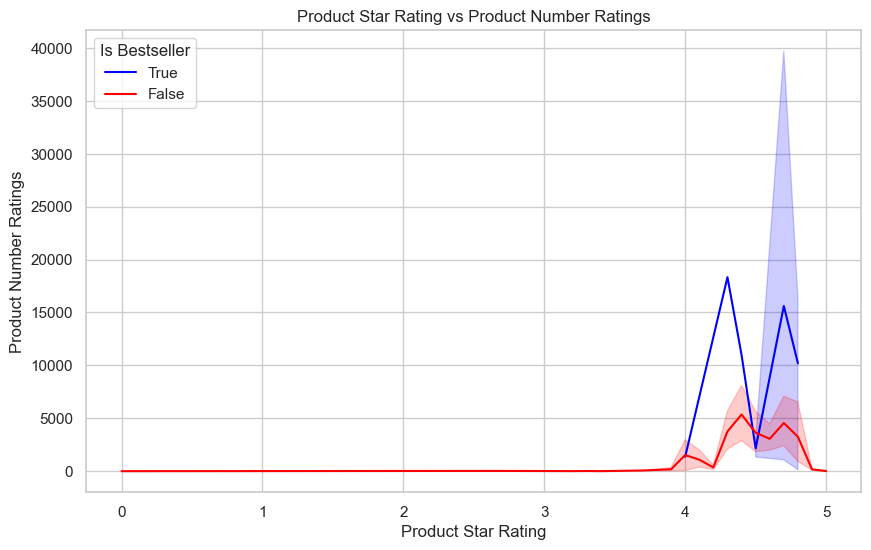

In [13]:
# Plot using Seaborn 
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))

# Plot for is_bestseller=True
sns.lineplot(data = df[df["is_best_seller"] == True], x = "product_star_rating", y = "product_num_ratings", color = "blue", label = "True")

# Plot for is_bestseller=False
sns.lineplot(data = df[df["is_best_seller"] == False], x = "product_star_rating", y = "product_num_ratings", color = "red", label = "False")

plt.title("Product Star Rating vs Product Number Ratings")
plt.xlabel("Product Star Rating")
plt.ylabel("Product Number Ratings")
plt.legend(title="Is Bestseller")

# Define the file path to save the visualization
plt.savefig("Visualizations/PSR vs PNR.png")

# Display the plot
plt.show()

After analyzing the Product Star Rating versus Product Number of Ratings, it is apparent that bestselling items tend to receive a higher quantity of ratings without necessarily reaching a 5-star rating. Conversely, non-bestselling items typically accumulate around 5000 ratings and maintain a similar maximum star rating.

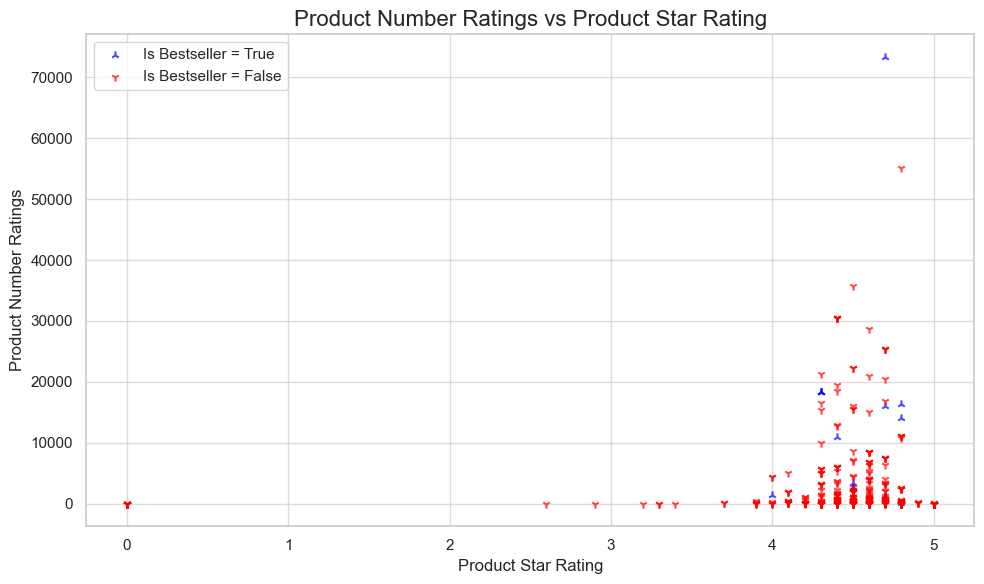

In [14]:
# Plot using Matplotlib
plt.figure(figsize = (10, 6))

# Scatter plot for bestsellers
plt.scatter(df[df["is_best_seller"] == True]["product_star_rating"],
            df[df["is_best_seller"] == True]["product_num_ratings"],
            color="blue", label="Is Bestseller = True", alpha = 0.7, marker = "2")

# Scatter plot for non-bestsellers
plt.scatter(df[df["is_best_seller"] == False]["product_star_rating"],
            df[df["is_best_seller"] == False]["product_num_ratings"],
            color="red", label="Is Bestseller = False", alpha = 0.7, marker = "1")

plt.title("Product Number Ratings vs Product Star Rating", fontsize = 16)
plt.xlabel("Product Star Rating", fontsize = 12)
plt.ylabel("Product Number Ratings", fontsize = 12)
plt.legend()
plt.grid(True, alpha = 0.7)
plt.tight_layout()

# Define the file path to save the visualization
plt.savefig("Visualizations/PSR vs PNR2.png")

# Display the plot
plt.show()

Upon analyzing the Product Number Ratings versus Product Star Rating using an alternative visualization, it becomes evident that there is a significantly higher engagement in rating non-bestselling items compared to bestselling ones.

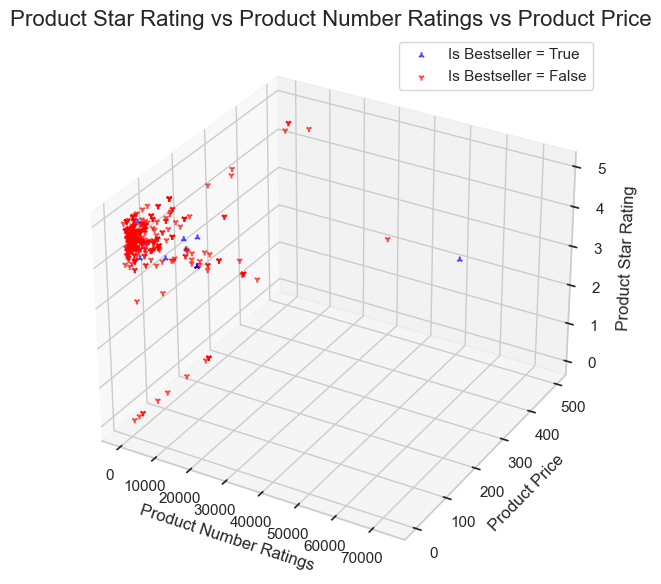

In [16]:
# Import Axes3D from mpl_toolkits.mplot3d to enable 3D plotting capabilities in Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Plot using mpl_toolkits.mplot3d
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Data Masks
is_bestseller = df["is_best_seller"]
bestseller_mask = is_bestseller == True
non_bestseller_mask = is_bestseller == False

# Scatter plot for bestsellers
ax.scatter(df[bestseller_mask]["product_num_ratings"],
           df[bestseller_mask]["product_price"],
           df[bestseller_mask]["product_star_rating"],
           color="blue", label="Is Bestseller = True", alpha=0.7, marker="2")

# Scatter plot for non-bestsellers
ax.scatter(df[non_bestseller_mask]["product_num_ratings"],
           df[non_bestseller_mask]["product_price"],
           df[non_bestseller_mask]["product_star_rating"],
           color="red", label="Is Bestseller = False", alpha=0.7, marker="1")

ax.set_title("Product Star Rating vs Product Number Ratings vs Product Price", fontsize=16)
ax.set_xlabel("Product Number Ratings", fontsize=12)
ax.set_ylabel("Product Price", fontsize=12)
ax.set_zlabel("Product Star Rating", fontsize=12)
ax.legend()
ax.grid(True, alpha=0.7)
plt.tight_layout()

# Define the file path to save the visualization
plt.savefig("Visualizations/PSR vs PNR vs PPrice.png")

# Display the plot
plt.show()

Upon examining the Product Star Rating vs Product Number Ratings vs Product Price visualization, we observe a correlation between product price and star rating, wherein lower-priced items tend to receive a higher proportion of high ratings. Furthermore, our analysis reveals that the distribution of product ratings is characterized by a consistent pattern, with the majority of products receiving fewer than 10,000 ratings, while a select few exhibit a significant increase in ratings, peaking at over 70,000. Notably, the review frequency of bestselling items lags behind that of non bestselling items, indicating a disparity in customer engagement between these two product categories.

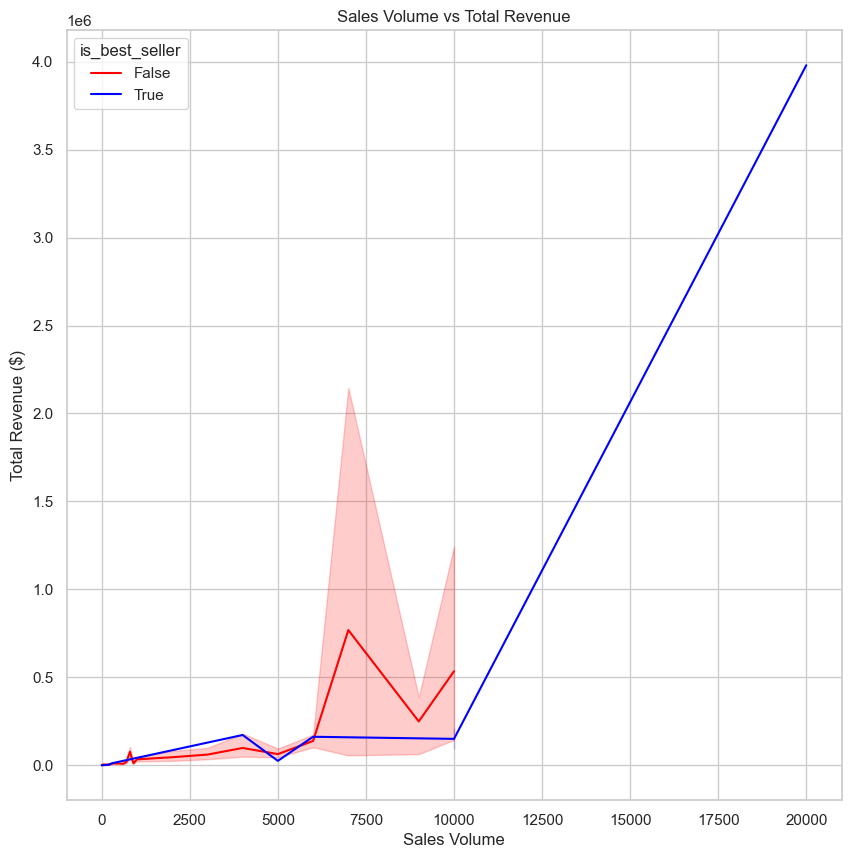

In [18]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Define a custom palette based on a boolean column
palette = {True: "blue", False: "red"}

# Plotting
sns.lineplot(x="sales_volume_numeric", y="total_revenue", hue="is_best_seller", data=df, palette=palette, ax=ax)
ax.set_xlabel("Sales Volume")
ax.set_ylabel("Total Revenue ($)")
ax.set_title("Sales Volume vs Total Revenue")

# Define the file path to save the visualization
plt.savefig("Visualizations/SV vs TR.png")

# Display the plot
plt.show()

Upon analyzing the Total Revenue versus Sales Volume, it is evident that the sales volume of bestselling items is nearly twice that of non-bestselling items, and they generate significantly higher total revenue compared to their counterpart.

<Figure size 1000x800 with 0 Axes>

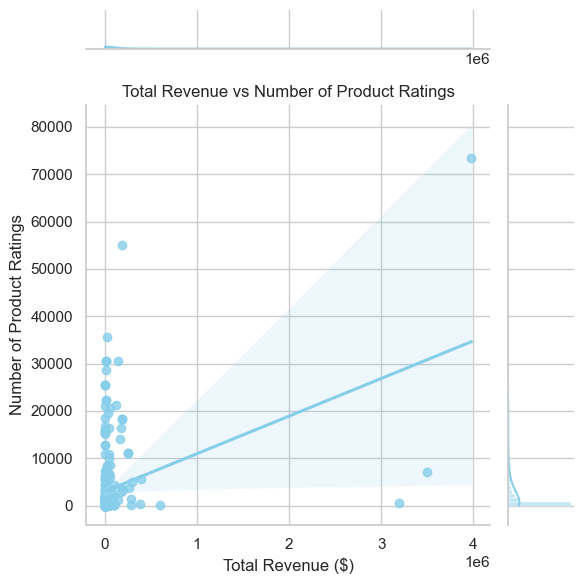

In [20]:
# Plotting
plt.figure(figsize = (10, 8))
sns.jointplot(x = "total_revenue", y = "product_num_ratings", data = df, kind = "reg", color = "skyblue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Number of Product Ratings")
plt.title("Total Revenue vs Number of Product Ratings")
plt.tight_layout()

# Define the file path to save the visualization
plt.savefig("Visualizations/TR vs PNR.png")

# Display the plot
plt.show()

After evaluating the relationship between Total Revenue and Number of Product Ratings, it is evident that the quantity of ratings does not directly correlate with Total Revenue.

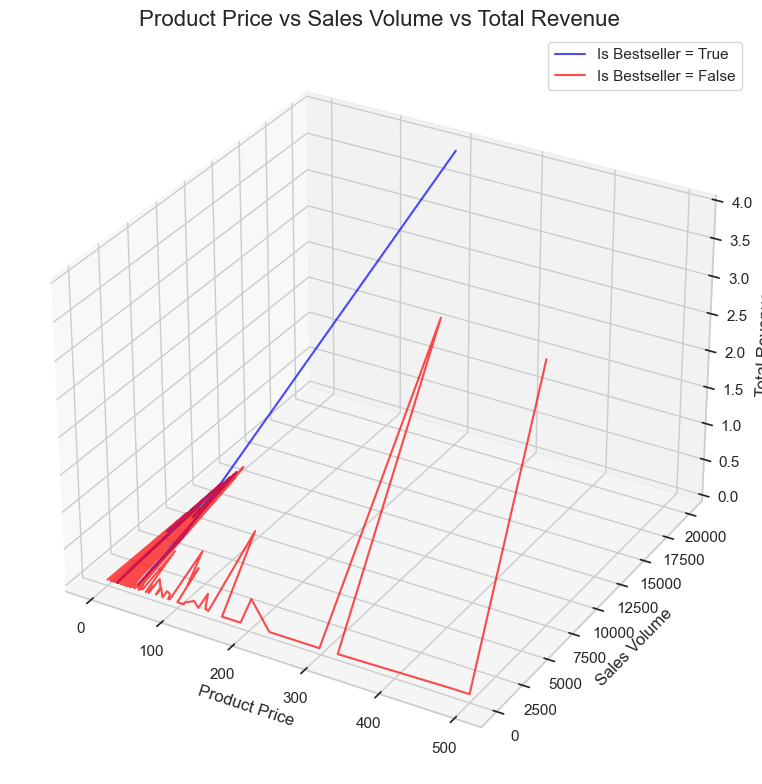

In [23]:
# Axes3D from mpl_toolkits.mplot3d was imported previously not needed in this part of code

# Create a new figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Sort the DataFrame by product_price and sales_volume_numeric
df = df.sort_values(by = ["product_price", "sales_volume_numeric"], ascending=False)

# Plotting lines for bestsellers
ax.plot(df[df["is_best_seller"] == True]["product_price"],
        df[df["is_best_seller"] == True]["sales_volume_numeric"],
        df[df["is_best_seller"] == True]["total_revenue"],
        color="blue", label="Is Bestseller = True", alpha=0.7)

# Plotting lines for non-bestsellers
ax.plot(df[df["is_best_seller"] == False]["product_price"],
        df[df["is_best_seller"] == False]["sales_volume_numeric"],
        df[df["is_best_seller"] == False]["total_revenue"],
        color="red", label="Is Bestseller = False", alpha=0.7)

# Setting titles and labels
ax.set_title("Product Price vs Sales Volume vs Total Revenue", fontsize=16)
ax.set_xlabel("Product Price", fontsize=12)
ax.set_ylabel("Sales Volume", fontsize=12)
ax.set_zlabel("Total Revenue", fontsize=12)

# Adding a legend
ax.legend()

# Define the file path to save the visualization
plt.savefig("Visualizations/PPrice vs SV vs TR.png")

# Displaying the plot
plt.tight_layout()
plt.show()


Upon analyzing the Product Price vs Sales Volume vs Total Revenue visualization, we observe that the top-selling items exhibit higher sales volume and total revenue compared to their counterparts. Notably, the best-selling component of the visualization displays a limited number of data points, indicating a potential anomaly. Furthermore, our analysis reveals that product price does not have a significant impact on sales volume, as both high-priced and low-priced items demonstrate high and low sales performance, respectively.

# Analysis
Product Star Rating vs. Product Number of Ratings:
Bestselling items tend to accumulate a higher quantity of ratings without necessarily reaching a 5-star rating. Non-bestselling items typically gather around 5000 ratings with a similar maximum star rating. This suggests that customer engagement might not solely depend on achieving a perfect rating for bestselling items.

Product Number of Ratings vs. Product Star Rating (Alternative Visualization):
There's significantly higher engagement in rating non-bestselling items compared to bestselling ones. This indicates that customers might be more inclined to rate products that are not bestsellers.

Product Star Rating vs. Product Number Ratings vs. Product Price:
Lower-priced items tend to receive a higher proportion of high ratings, suggesting that customers might have higher expectations for more expensive products. The majority of products receive fewer than 10,000 ratings, but there are some outliers with significantly higher ratings, especially among non-bestselling items. Bestselling items show a lower frequency of reviews compared to non-bestselling items, indicating differences in customer engagement.

Most Rated and Least Rated Products:
The Meta Quest 2 VR headset stands out as the most rated product with 73,340 ratings and a high star rating of 4.7, indicating strong customer satisfaction and its bestseller status. On the other hand, the National Geographic: Panda game for Nintendo DS has zero ratings and a 0.0 star rating, reflecting a lack of consumer engagement and interest. This highlights the crucial role of customer reviews in influencing product visibility and market success.

Total Revenue vs. Sales Volume:
Bestselling items significantly outsell non-bestselling items by almost twice the quantity and contribute approximately 53% more to the Total Revenue. This indicates that being a bestseller strongly correlates with higher sales volume and revenue generation.

Total Revenue vs. Number of Product Ratings:
There isn't a direct correlation between the quantity of ratings and Total Revenue. This suggests that the number of ratings alone may not be indicative of a product's revenue-generating potential.

Product Price vs. Sales Volume vs. Total Revenue:
High sales volume and total revenue are observed for top-selling items compared to others. However, there's a notable anomaly in the best-selling category with a limited number of data points. Interestingly, product price doesn't seem to significantly impact sales volume, as both high and low-priced items demonstrate varying sales performance.

Bestselling and Worstselling Products:
The Meta Quest 2 VR headset emerges as the bestselling product with a sales volume of 20,000 and total revenue of $3,980,000, further confirmed by its bestseller status. Conversely, the Brightown CR2032 Batteries has no sales volume or revenue, indicating significant market challenges and lack of consumer interest. This highlights the critical role of sales performance and market demand in a product's success.

Paired T-Test Results:
There are significant differences observed between product star ratings and the number of ratings received, product prices and total revenue generated, product prices and sales volume, product star ratings and total revenue generated, and product star ratings and sales volume. These differences indicate the influence of these factors on each other and can provide valuable insights for product analysis and strategy.